In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
def cameraCalibrate(image):
    # Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
    import glob

    #read in and make a list of calibration images
    images = glob.glob('./camera_cal/calibration*.jpg')

    #Arrays to store objects points and image points from all the images
    objpoints = [] #3d points
    imgpoints = [] #2d points

    #prepare points
    objp  = np.zeros((9*6,3),np.float32)
    objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)


    for fname in images:
        #read in each image
        img = mpimg.imread(fname)
        #convert image to gray scale  
        gray  = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
        #find corners  
        ret,corners = cv2.findChessboardCorners(gray,(9,6),None)
        if ret == True:
            imgpoints.append(corners)
            objpoints.append(objp)
            
    shape =(img.shape[1],img.shape[0])
    ret, mtx, dist, rvect, tvect = cv2.calibrateCamera(objpoints,imgpoints,shape,None,None)
    
    #undistored the image
    undistorted_image = cv2.undistort(image, mtx, dist, None, mtx)
    return undistorted_image

## Load Task Image

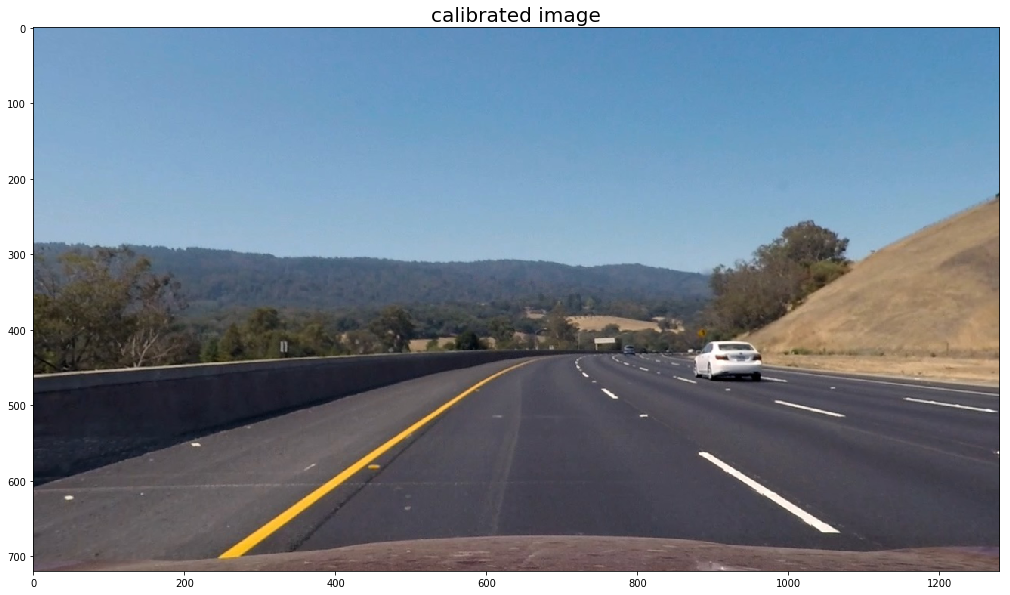

In [23]:
task_image = mpimg.imread('./test3.jpg')

f, (ax2) = plt.subplots(1, 1, figsize=(20,10))
#ax1.set_title('Original image', fontsize=20)
#ax1.imshow(task_image)
ax2.set_title('calibrated image', fontsize=20)
ax2.imshow(cameraCalibrate(task_image))

## Src Points

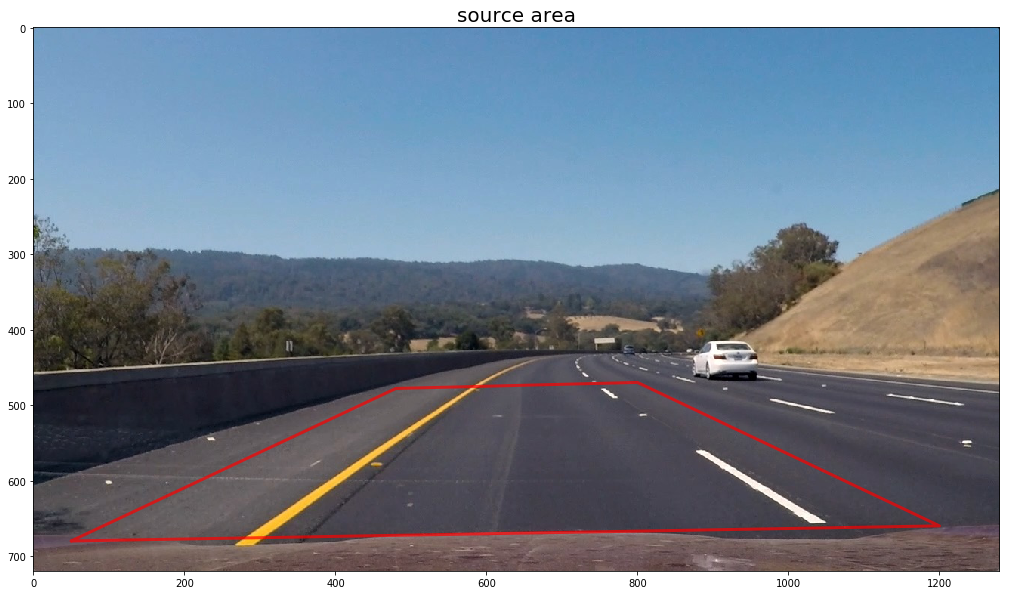

In [58]:
# source points
# make sure that the points follow the right arrangement whether it's clockwise or counter-clockwise
# source and destination points must have the same arrangement whether it's clockwise or counter-clockwise
# The points in src array are (x,y).
src = np.float32([[50,680],[1200,660],
                  [800,470],[480,478]])

# visualize your mask region
f, (ax1) = plt.subplots(1, 1, figsize=(20,10))
ax1.set_title('source area', fontsize=20)
ax1.imshow(task_image)
ordered_y = [src[0][1],src[1][1],src[2][1],src[3][1],src[0][1]]
ordered_x = [src[0][0],src[1][0],src[2][0],src[3][0],src[0][0]]
ax1.plot(ordered_x,ordered_y , color='red', alpha=0.7,
    linewidth=3, solid_capstyle='round', zorder=2)

In [59]:
## Dst Points

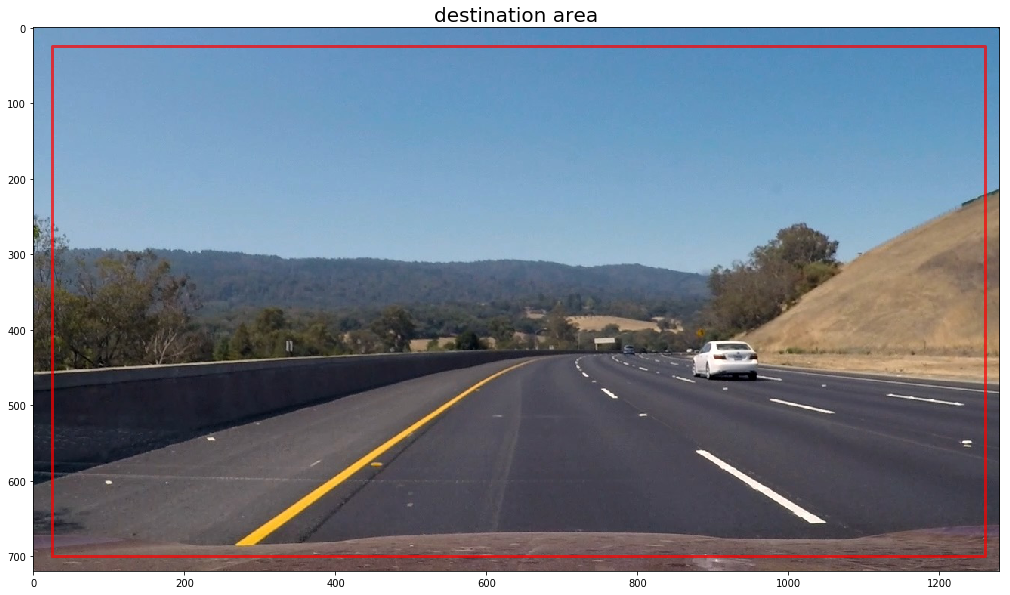

In [60]:
# destination points
# make sure that the points follow the right arrangement whether it's clockwise or counter-clockwise
# source and destination points must have the same arrangement whether it's clockwise or counter-clockwise
# The points in src array are (x,y).
dst = np.float32([[25,700],[1260,700],
                  [1260,25],[25,25]])

# visualize your mask region
f, (ax1) = plt.subplots(1, 1, figsize=(20,10))
ax1.set_title('destination area', fontsize=20)
ax1.imshow(task_image)
ordered_y = [dst[0][1],dst[1][1],dst[2][1],dst[3][1],dst[0][1]]
ordered_x = [dst[0][0],dst[1][0],dst[2][0],dst[3][0],dst[0][0]]
ax1.plot(ordered_x,ordered_y , color='red', alpha=0.7,
    linewidth=3, solid_capstyle='round', zorder=2)

## Perspective Transformation

In [61]:
def perspective_transform(undistorted):   
    img_size = (undistorted.shape[1], undistorted.shape[0])
    M = cv2.getPerspectiveTransform(src,dst)
    transformed_img = cv2.warpPerspective(undistorted,M,img_size,flags=cv2.INTER_LINEAR)
    return transformed_img

## Perspective Transformation result

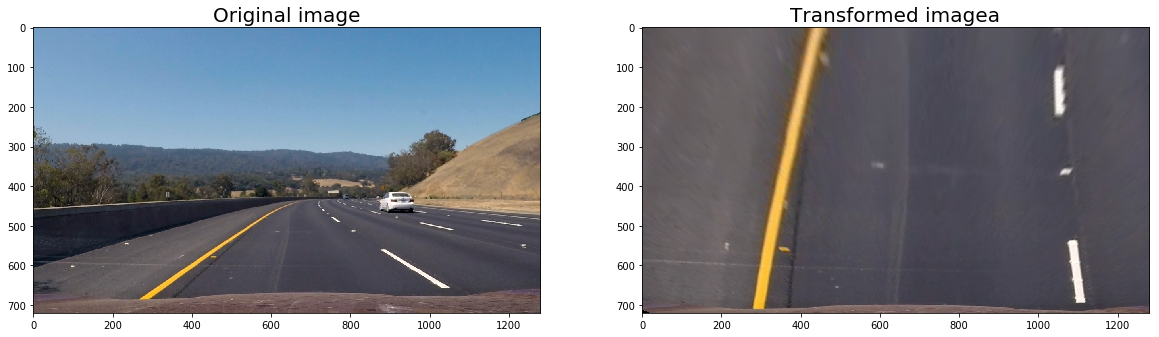

In [62]:
# Undistord the image then apply perspective transformation
transformed_img = perspective_transform(task_image)
# visualize your results
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Original image', fontsize=20)
ax1.imshow(task_image)
ax2.set_title('Transformed imagea', fontsize=20)
ax2.imshow(transformed_img)